# Linear Regression

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
od.download("https://www.kaggle.com/datasets/yasserh/housing-prices-dataset")

Skipping, found downloaded files in "./housing-prices-dataset" (use force=True to force download)


In [ ]:
df = pd.read_csv("/content/housing-prices-dataset/Housing.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
  df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [ ]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
# 1. finding missing values
# 2. filling missing values
# 3. dropping outliers
# 4. feature engineering
# 5. feature selection

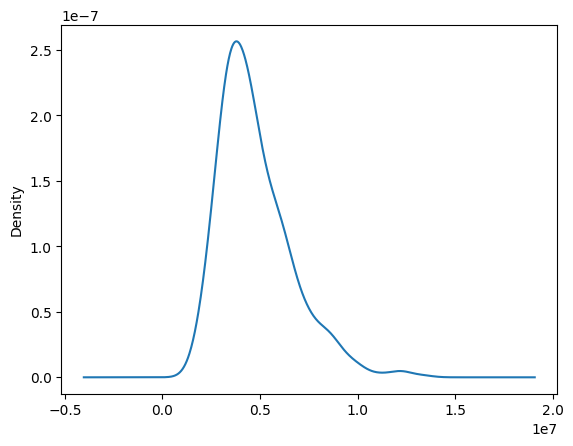

In [ ]:
df['price'].plot(kind='kde')
plt.show()

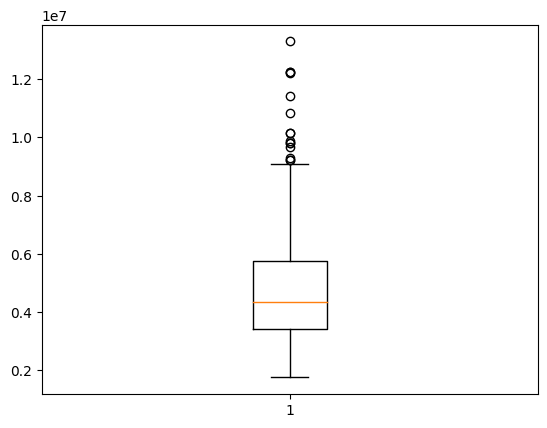

In [ ]:
plt.boxplot(df['price'])
plt.show()

In [ ]:
df.describe().columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

In [ ]:
column_names = np.array(df.describe().columns).reshape(3,2)
column_names
def check_outliers(df,column_names):
  fig ,ax = plt.subplots(3,2,figsize=(10,10))
  for row in range(3):
    for col in range(2):
      ax[row,col].boxplot(df[ column_names[row][col]])
      ax[row,col].set_title(column_names[row,col])

check_outliers(df,column_names)

array([['price', 'area'],
       ['bedrooms', 'bathrooms'],
       ['stories', 'parking']], dtype=object)

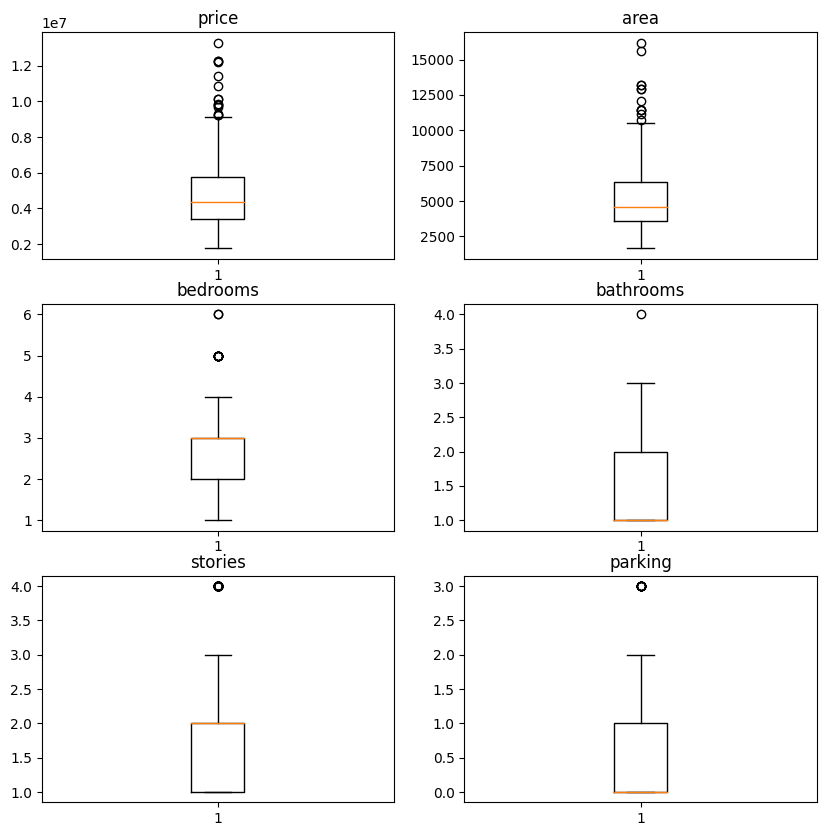

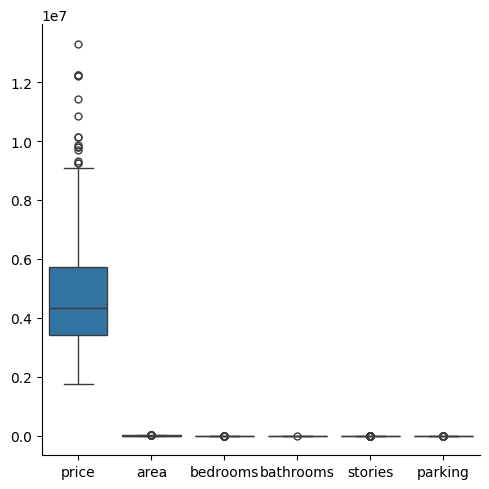

In [ ]:
sns.catplot(data=df,kind='box')

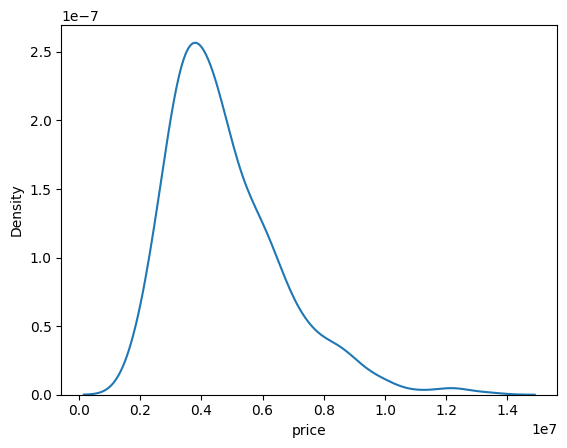

In [ ]:
#kde
sns.kdeplot(data=df,x='price')
plt.show()

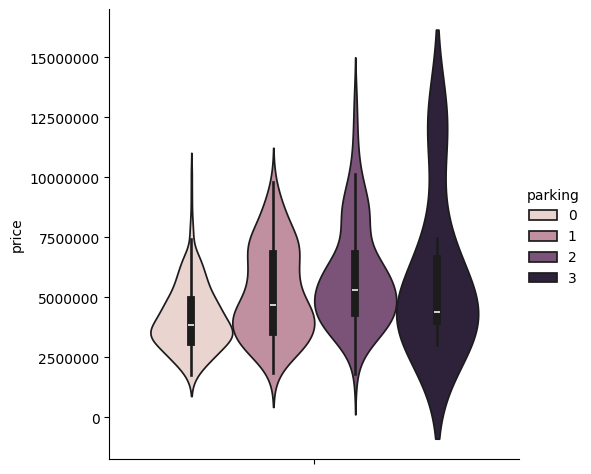

In [ ]:
sns.catplot(data=df,kind='violin',hue='parking',y='price')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
lower_bound = df.area.quantile(0.25)
upper_bound = df.area.quantile(0.75)

In [ ]:
#IQR
IQR = upper_bound - lower_bound
IQR

2760.0

In [ ]:
upper_range = upper_bound + 1.5*IQR
lower_range = lower_bound - 1.5*IQR

In [ ]:
df_filtered = df.loc[(df["area"] < upper_range) & (df["area"] > lower_range)]

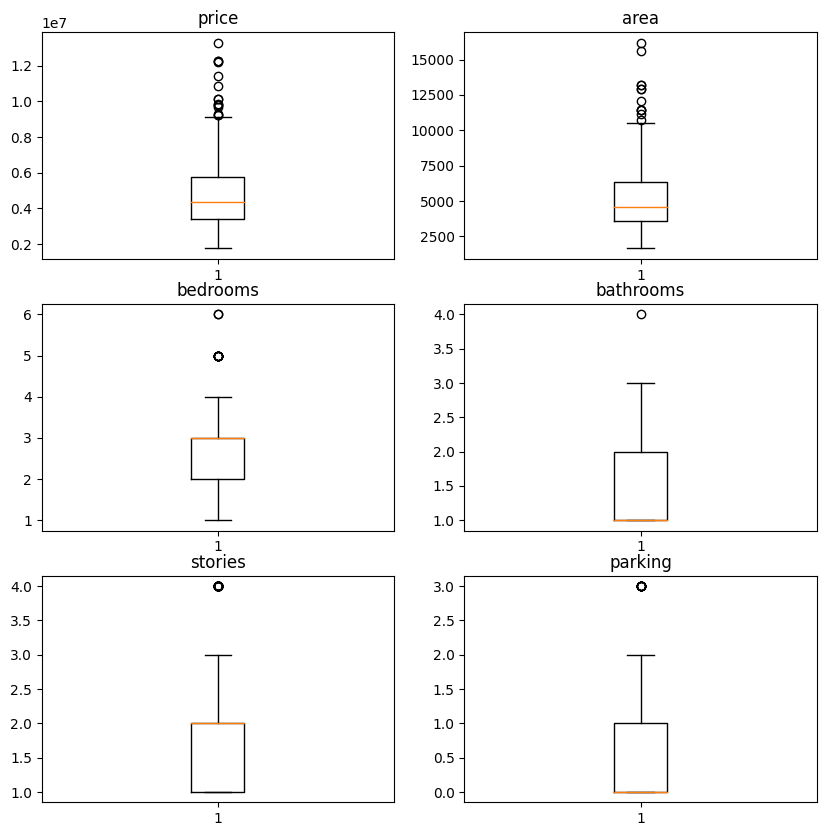

In [ ]:
check_outliers(df_filtered,column_names)

In [ ]:
#price IQR
lower_bound = df_filtered.price.quantile(0.25)
upper_bound = df_filtered.price.quantile(0.75)
#IQR
IQR = upper_bound - lower_bound
IQR

upper_range = upper_bound + 1.5*IQR
lower_range = lower_bound - 1.5*IQR

df_filtered2 = df_filtered.loc[(df_filtered["price"] < upper_range) & (df_filtered["price"] > lower_range)]


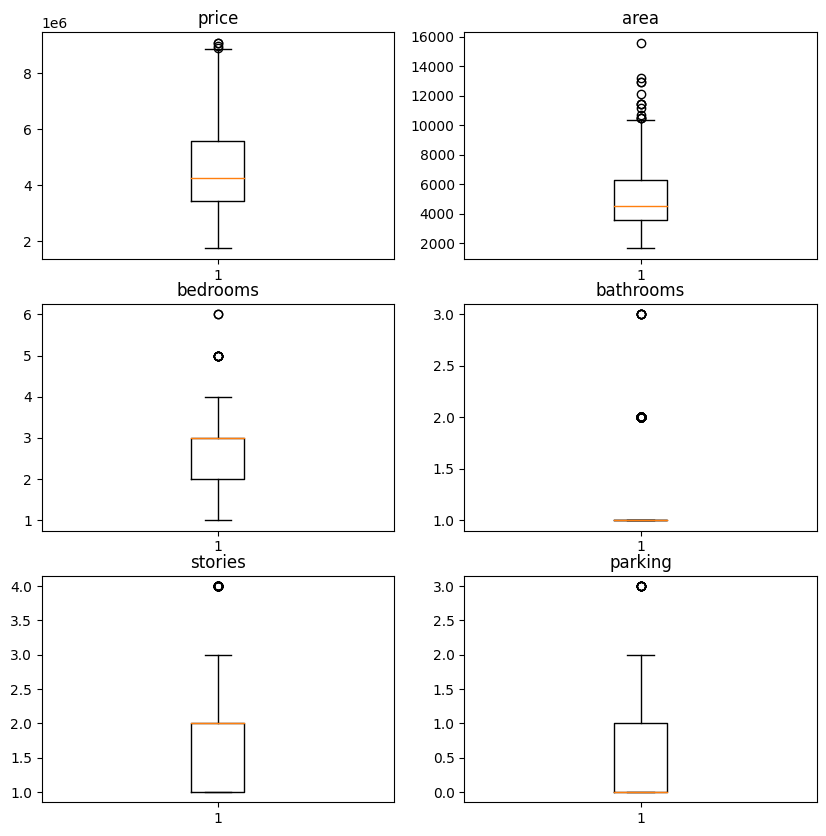

In [ ]:
check_outliers(df_filtered2,column_names)

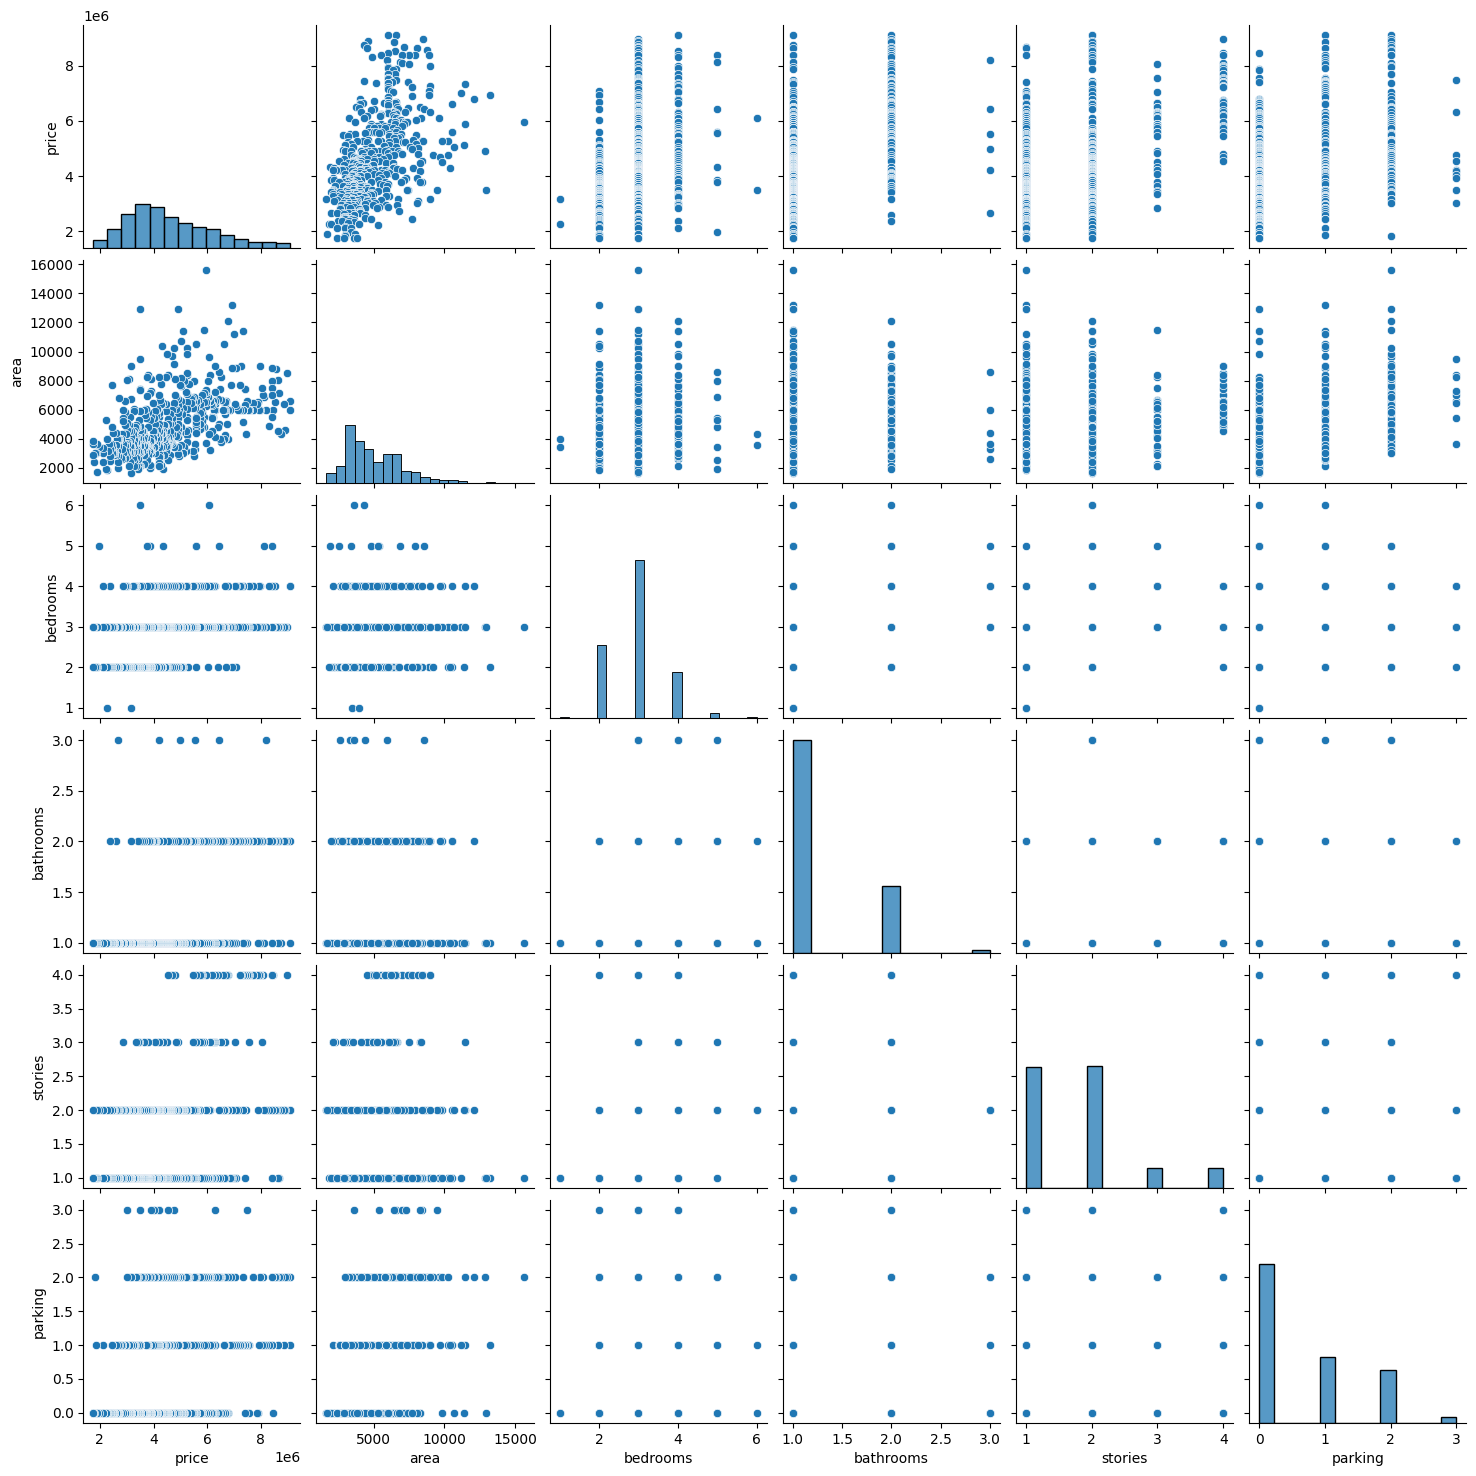

In [ ]:
sns.pairplot(df_filtered2)


In [ ]:
df_filtered2.corr(numeric_only=True)

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.509856,0.332293,0.457962,0.432528,0.328308
area,0.509856,1.000000,0.112056,0.133472,0.063939,0.344797
bedrooms,0.332293,0.112056,1.000000,0.350025,0.404628,0.110234
bathrooms,0.457962,0.133472,0.350025,1.000000,0.308026,0.127184
stories,0.432528,0.063939,0.404628,0.308026,1.000000,0.019222
parking,0.328308,0.344797,0.110234,0.127184,0.019222,1.000000


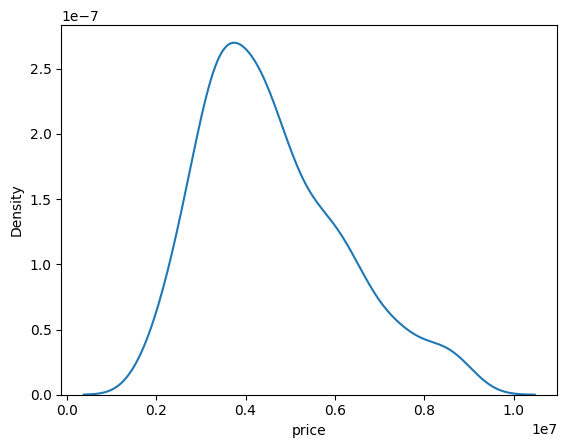

<Axes: xlabel='area', ylabel='Density'>

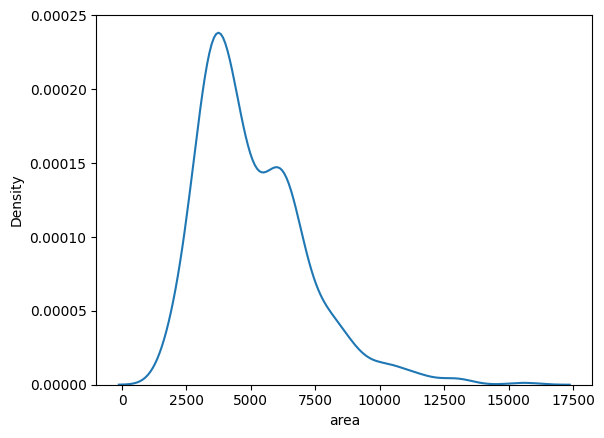

In [ ]:
sns.kdeplot(data=df_filtered2,x='price')
plt.show()
sns.kdeplot(data=df_filtered2,x='area')

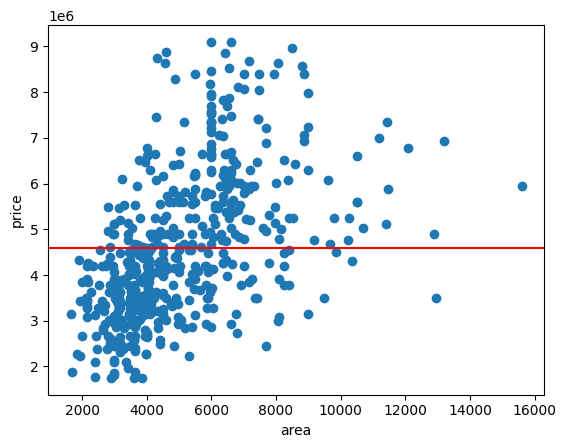

In [ ]:
plt.scatter(df_filtered2['area'],df_filtered2['price'])
avg = df_filtered2['price'].mean()
plt.axhline(avg,color='red')
plt.xlabel('area')
plt.ylabel('price')
plt.show()

In [ ]:
#y = mx + c

![](https://images.shiksha.com/mediadata/ugcDocuments/images/wordpressImages/2022_11_image-78.jpg)

In [ ]:
x = np.array(df_filtered2['area'])
y = np.array(df_filtered2['price'])
x_dash = np.mean(x)
y_dash = np.mean(y)
m = np.sum((x - x_dash)*(y - y_dash))/np.sum((x - x_dash)**2)
c = y_dash - m*x_dash

In [ ]:
print(m,c)

392.1034416265683 2616024.1263686027


In [ ]:
def predict(x):
  return m*x + c

In [ ]:
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [ ]:
predict(7420)

5525431.663237739

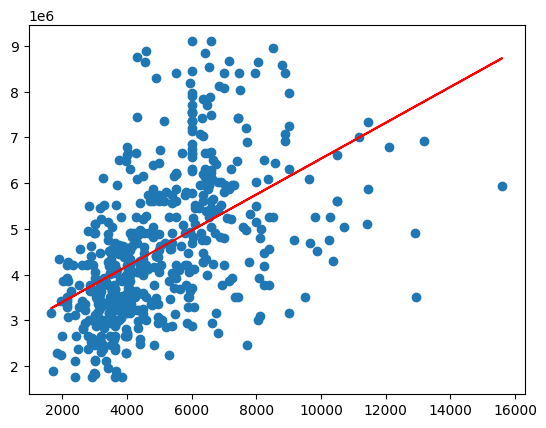

In [ ]:
x = np.array(df_filtered2['area'])
y_pred = predict(x)
plt.scatter(x,y)
plt.plot(x,y_pred,color='red')
plt.show()

In [ ]:
df_filtered2.loc[df["furnishingstatus"]=="furnished",["furnishingstatus"]] = 0

In [ ]:
df_filtered2.loc[df["furnishingstatus"]=="semi-furnished",["furnishingstatus"]] = 1
df_filtered2.loc[df["furnishingstatus"]=="unfurnished",["furnishingstatus"]] = 2

In [ ]:
df_filtered2.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,1
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,2
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,0
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,0
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,1


In [ ]:
# convert categorical values of mainroad, guestroom ,basement , hotwaterheating,airconditioning,prefarea to numerical value
df_filtered2.loc[df["mainroad"]=="yes",["mainroad"]] = 1
df_filtered2.loc[df["mainroad"]=="no",["mainroad"]] = 0

df_filtered2.loc[df["guestroom"]=="yes",["guestroom"]] = 1
df_filtered2.loc[df["guestroom"]=="no",["guestroom"]] = 0

df_filtered2.loc[df["basement"]=="yes",["basement"]] = 1
df_filtered2.loc[df["basement"]=="no",["basement"]] = 0

df_filtered2.loc[df["hotwaterheating"]=="yes",["hotwaterheating"]] = 1
df_filtered2.loc[df["hotwaterheating"]=="no",["hotwaterheating"]] = 0

df_filtered2.loc[df["airconditioning"]=="yes",["airconditioning"]] = 1
df_filtered2.loc[df["airconditioning"]=="no",["airconditioning"]] = 0

df_filtered2.loc[df["prefarea"]=="yes",["prefarea"]] = 1
df_filtered2.loc[df["prefarea"]=="no",["prefarea"]] = 0



In [ ]:
df_filtered2.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,2
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1


In [ ]:
df3  =  df_filtered2.drop(["mainroad","guestroom","basement","hotwaterheating","airconditioning",'prefarea'],axis=1)

In [ ]:
df3.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus
15,9100000,6000,4,1,2,2,1
16,9100000,6600,4,2,2,1,2
17,8960000,8500,3,2,4,2,0
18,8890000,4600,3,2,2,2,0
19,8855000,6420,3,2,2,1,1


In [ ]:
df3.corr()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus
price,1.000000,0.509856,0.332293,0.457962,0.432528,0.328308,-0.303320
area,0.509856,1.000000,0.112056,0.133472,0.063939,0.344797,-0.170043
bedrooms,0.332293,0.112056,1.000000,0.350025,0.404628,0.110234,-0.110891
bathrooms,0.457962,0.133472,0.350025,1.000000,0.308026,0.127184,-0.145684
stories,0.432528,0.063939,0.404628,0.308026,1.000000,0.019222,-0.100844
parking,0.328308,0.344797,0.110234,0.127184,0.019222,1.000000,-0.149128
furnishingstatus,-0.303320,-0.170043,-0.110891,-0.145684,-0.100844,-0.149128,1.000000


In [ ]:
!pip freeze scikit-learn

absl-py==1.4.0
accelerate==0.34.2
aiohappyeyeballs==2.4.0
aiohttp==3.10.5
aiosignal==1.3.1
alabaster==0.7.16
albucore==0.0.16
albumentations==1.4.15
altair==4.2.2
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.19.0
astropy==6.1.3
astropy-iers-data==0.2024.9.16.0.32.21
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==24.2.0
audioread==3.0.1
autograd==1.7.0
babel==2.16.0
backcall==0.2.0
beautifulsoup4==4.12.3
bigframes==1.18.0
bigquery-magics==0.2.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.4.3
bqplot==0.12.43
branca==0.7.2
build==1.2.2
CacheControl==0.14.0
cachetools==5.5.0
catalogue==2.0.10
certifi==2024.8.30
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.86
clarabel==0.9.0
click==8.1.7
cloudpathlib==0.19.0
cloudpickle==2.2.1
cmake==3.30.3
cmdstanpy==1.2.4
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6
contextlib2==21.6.

In [ ]:
df3["area"].shape

(530,)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
x = np.array(df3["area"]).reshape(-1,1)
y = np.array(df3["price"])
lr.fit(x,y)

LinearRegression()

In [ ]:
lr.coef_

array([392.10344163])

In [ ]:
lr.predict([[7420]])

array([5525431.66323774])

In [ ]:
#how to select the features
#1. correlation
df3.corr()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus
price,1.000000,0.509856,0.332293,0.457962,0.432528,0.328308,-0.303320
area,0.509856,1.000000,0.112056,0.133472,0.063939,0.344797,-0.170043
bedrooms,0.332293,0.112056,1.000000,0.350025,0.404628,0.110234,-0.110891
bathrooms,0.457962,0.133472,0.350025,1.000000,0.308026,0.127184,-0.145684
stories,0.432528,0.063939,0.404628,0.308026,1.000000,0.019222,-0.100844
parking,0.328308,0.344797,0.110234,0.127184,0.019222,1.000000,-0.149128
furnishingstatus,-0.303320,-0.170043,-0.110891,-0.145684,-0.100844,-0.149128,1.000000


In [ ]:
x = df3[['area','stories']]

In [ ]:
x

,area,stories
15,6000,2
16,6600,2
17,8500,4
18,4600,2
19,6420,2
...,...,...
540,3000,1
541,2400,1
542,3620,1
543,2910,1


<Axes: ylabel='Density'>

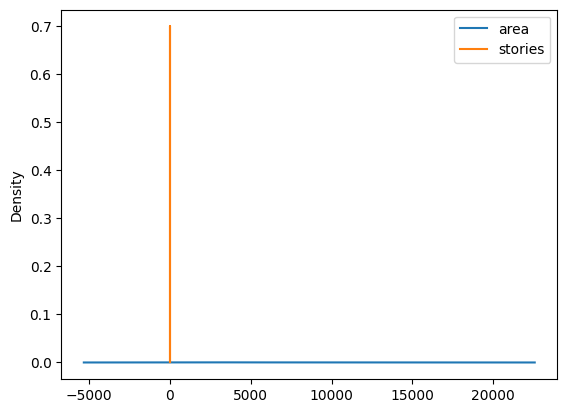

In [ ]:
df3[['area','stories']].plot(kind ='kde')

In [ ]:
df3.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'furnishingstatus'],
      dtype='object')

In [ ]:
df3.shape

(530, 7)

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x = df_filtered2.drop(['price'],axis = 1)
x_scaled = scalar.fit_transform(x)

In [ ]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,6000,4,1,2,1,0,1,0,0,2,0,1
16,6600,4,2,2,1,1,1,0,1,1,1,2
17,8500,3,2,4,1,0,0,0,1,2,0,0
18,4600,3,2,2,1,1,0,0,1,2,0,0
19,6420,3,2,2,1,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [ ]:
scalar.mean_

array([5.06151887e+03, 2.94339623e+00, 1.26037736e+00, 1.78867925e+00,
       8.54716981e-01, 1.75471698e-01, 3.47169811e-01, 4.33962264e-02,
       3.05660377e-01, 6.64150943e-01, 2.22641509e-01, 1.08113208e+00])

In [ ]:
scalar.scale_

array([2.07349058e+03, 7.29825369e-01, 4.63920790e-01, 8.60377358e-01,
       3.52385958e-01, 3.80370058e-01, 4.76070303e-01, 2.03747378e-01,
       4.60686565e-01, 8.42524137e-01, 4.16019552e-01, 7.59234123e-01])

In [ ]:
lr2 = LinearRegression()
lr2.fit(x_scaled,y)

LinearRegression()

In [ ]:
lr2.coef_

array([ 450679.38049105,   59989.98716085,  359550.78659352,
        398210.98476674,  160988.9115592 ,  136596.06015527,
        172605.52654578,  155320.33990017,  375033.27477304,
        175748.93214225,  199245.16461176, -148311.64011598])

In [ ]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
x_test = x
x_test_scaled = scalar.transform(x_test)
predicted = lr2.predict(x_test_scaled)

In [ ]:
y.shape

(530,)

In [ ]:
predicted.shape

(530,)

In [ ]:
testing = pd.DataFrame({'actual':y,'predicted':predicted})

In [ ]:
testing.head()

,actual,predicted
0,9100000,4.933515e+06
1,9100000,7.087132e+06
2,8960000,7.742247e+06
3,8890000,6.328018e+06
4,8855000,6.439478e+06


In [ ]:
from sklearn.metrics import r2_score
r2_score(y,predicted)

0.6630355342904698